In [1]:
from arch import arch_model
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from math import sqrt
import seaborn as sns
warnings.filterwarnings("ignore")
sns.set()

In [2]:
df = pd.read_csv("E95_price_1.csv",
index_col='year',
parse_dates=True)

print(df.shape)
df.tail()

(107, 1)


,E95
year,
2022-11-11,23860
2022-11-21,23780
2022-12-01,22700
2022-12-12,21200
2022-12-21,20700


<AxesSubplot:xlabel='year'>

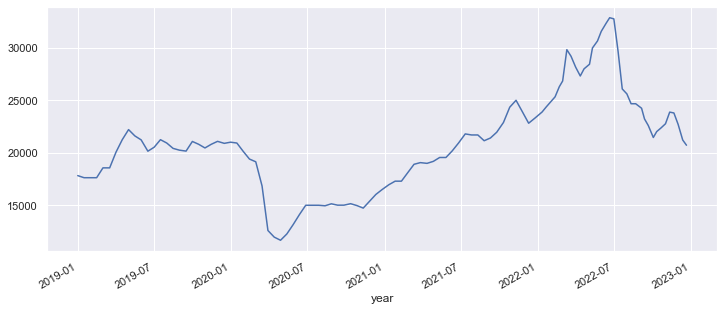

In [3]:
df["E95"].plot(figsize=(12,5))

In [4]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF :" , dftest[0])
    print("2. P-value : ", dftest[1])
    print("3. Num of lags : ", dftest[2])
    print("4. number of observation for ADF Regression and critical value Calculation :" , dftest[3])
    for key, val in dftest[4].items():
        print("\t", key ," ", val)

In [5]:
ad_test(df["E95"])

1. ADF : -1.8887961052014675
2. P-value :  0.3373499935596974
3. Num of lags :  1
4. number of observation for ADF Regression and critical value Calculation : 105
	 1%   -3.4942202045135513
	 5%   -2.889485291005291
	 10%   -2.5816762131519275


In [6]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [7]:
stepwise_fit = auto_arima(df["E95"],trace = True, suppress_warnings= True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1755.169, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1763.202, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1749.781, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1750.670, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1761.291, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1751.608, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1751.611, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1753.506, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1747.722, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1749.547, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1749.560, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1748.643, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1751.363, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.628 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -871.861
Date:                Wed, 04 Jan 2023   AIC                           1747.722
Time:                        18:18:28   BIC                           1753.048
Sample:                             0   HQIC                          1749.881
                                - 107                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2937      0.033      8.968      0.000       0.229       0.358
sigma2      7.237e+05   5.95e+04     12.167      0.000    6.07e+05     8.4e+05
===================================================================================
Ljung-Box (L1) (Q):                   5.51   Jarque-Bera (JB):                83.23
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -1.18
Prob(H) (two-sided):                  0.63   Kurtosis:                         6.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
def split_data(data, test_split):
    l = len(data)
    t_idx = round(l*(1-test_split))
    train, test = data[ :t_idx], data[t_idx : ]
    print(f'train: {len(train)} , test: {len(test)}')
    return train, test

In [9]:
test_split = 0.2
train, test = split_data(df, test_split)

train: 86 , test: 21


In [10]:
model = sm.tsa.statespace.SARIMAX(train["E95"],order = (1,1,0), seasanal_order = (0,0,0,0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    E95   No. Observations:                   86
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -692.879
Date:                Wed, 04 Jan 2023   AIC                           1389.757
Time:                        18:18:28   BIC                           1394.643
Sample:                             0   HQIC                          1391.722
                                 - 86                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.042      5.737      0.000       0.158       0.322
sigma2      6.327e+05   5.53e+04     11.445      0.000    5.24e+05    7.41e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.88   Jarque-Bera (JB):               116.09
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               1.73   Skew:                            -1.08
Prob(H) (two-sided):                  0.15   Kurtosis:                         8.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
start = len(train)
end = len(train) + len(test) -1
pred = model.predict(start = start, end = end, typ = 'levels')

print(pred)
pred.index = df.index[start: end +1]

86     30810.604943
87     30849.103373
88     30858.331788
89     30860.543921
90     30861.074188
91     30861.201298
92     30861.231768
93     30861.239072
94     30861.240822
95     30861.241242
96     30861.241343
97     30861.241367
98     30861.241373
99     30861.241374
100    30861.241374
101    30861.241374
102    30861.241374
103    30861.241374
104    30861.241374
105    30861.241374
106    30861.241374
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='year'>

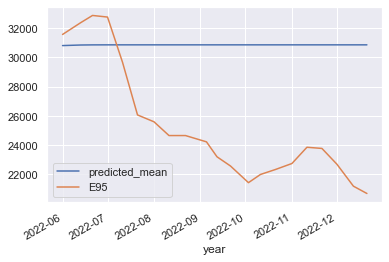

In [12]:
pred.plot(legend = True)
test["E95"].plot(legend= True)

In [13]:
test["E95"].mean()

25286.666666666668

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test["E95"]))
print(rmse)

6826.58233857721


In [15]:
model2 = sm.tsa.statespace.SARIMAX(train["E95"], order = (1,1,0))
model2 = model2.fit()
df.tail()

,E95
year,
2022-11-11,23860
2022-11-21,23780
2022-12-01,22700
2022-12-12,21200
2022-12-21,20700


In [16]:
index_future_dates = pd.date_range(start= "05/23/2022", end = "01/28/2023")
pred = model2.predict(start = len(df), end = len(df)+ 250, typ = " levels").rename("Sarima prediction")
pred.index = index_future_dates


<AxesSubplot:>

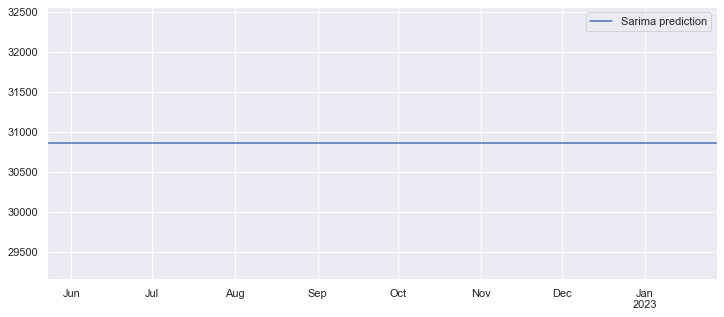

In [17]:
pred.plot(figsize = (12,5), legend = True)

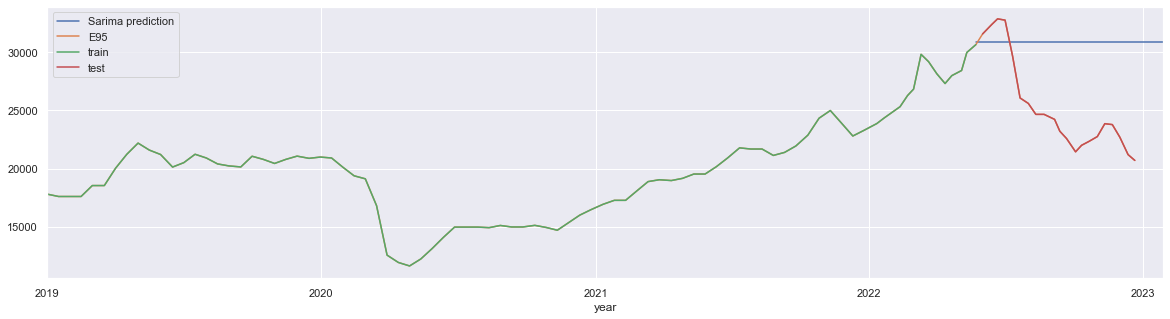

In [18]:
plt.rcParams["figure.figsize"] = [20,5]
pred.plot()
df["E95"].plot()
plt.plot(train, label = "train")
plt.plot(test, label = 'test')
plt.legend(loc = 'best')
plt.show()